## Day 24 Lecture 2 Assignment

In this assignment, we will build our a more complex logistic regression model, this time on both numeric and categorical data. We will use the Chicago traffic crashes dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def missingness_summary(df, print_log=False, sort='none'):
    summary = df.apply(lambda x: x.isna().sum() / x.shape[0])
    
    if print_log == True:
        if sort == 'none':
            print(summary)
        elif sort == 'ascending':
            print(summary.sort_values())
        elif sort == 'descending':
            print(summary.sort_values(ascending=False))
        else:
            print('Invalid value for sort parameter.')
        
    return summary

In [3]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')

In [ ]:
crash_data.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN
0,JC334993,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/4/2019 23:05,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JC370822,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",7/30/2019 10:25,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JC387098,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",8/10/2019 17:35,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JC395195,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",8/16/2019 16:53,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,JC396604,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",8/17/2019 18:30,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0


First, create a binary response column by modifying the "DAMAGE" column. Consider "OVER \$1500" to be the positive class, and under \$1500 to be the negative class.

In [4]:
crash_data['DAMAGE_BIN'] = np.where(crash_data['DAMAGE'] == "OVER $1,500", 1, 0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


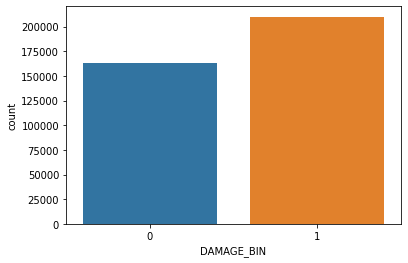

In [ ]:
sns.countplot(crash_data['DAMAGE_BIN'])

Using the code from Day 21, Lecture 1 as a starting point, devise an appropriate way to address missing values. You have a lot of freedom here; we will proceed by taking the following steps:

- Dropping all columns with more than 5% missing data
- Imputing the median for numeric columns with less than 5% missing data (except for STREET_NO; imputing it in this manner would not make any sense)
- Dropping rows with missing data for categorical columns that have less than 5% missing data

In [5]:
crash_data.isnull().mean()

RD_NO                            0.000000
CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
LANE_CNT                         0.467107
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
REPORT_TYPE                      0.023012
CRASH_TYPE                       0.000000
INTERSECTION_RELATED_I           0.779457
NOT_RIGHT_OF_WAY_I               0.953917
HIT_AND_RUN_I                    0.722423
DAMAGE                           0.000000
DATE_POLICE_NOTIFIED             0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0.000000
STREET_NO                        0.000000
STREET_DIRECTION                 0

In [6]:
toDrop = crash_data.columns[crash_data.isnull().mean() > 0.05]
crash_data.drop(toDrop, axis=1, inplace=True)

In [7]:
crash_data.drop('STREET_NO', axis=1, inplace=True)

In [8]:
crash = crash_data.copy()

In [10]:
crash.isnull().mean()

RD_NO                            0.000000
CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
REPORT_TYPE                      0.023012
CRASH_TYPE                       0.000000
DAMAGE                           0.000000
DATE_POLICE_NOTIFIED             0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0.000000
STREET_DIRECTION                 0.000005
STREET_NAME                      0.000003
BEAT_OF_OCCURRENCE               0.000011
NUM_UNITS                        0.003755
MOST_SEVERE_INJURY               0.005795
INJURIES_TOTAL                   0

In [12]:
toImpute = crash_data.columns[crash_data.isnull().mean() < 0.05]

In [13]:
crash['RD_NO'].dtypes

dtype('O')

In [16]:
for col in toImpute:
    if crash[col].dtypes != 'O': 
        crash[col].fillna(crash[col].mean(), inplace=True)

Finally, choose a few numeric and categorical features (2-3 of each) to include in the model. (You can definitely include more than this, but too many features, especially categorical ones, will most likely lead to convergence issues). One hot encode the chosen categorical features, being sure to omit one of the categories (which will serve as a "reference" level) to avoid perfect multicollinearity.

Again, you have a lot of freedom here; we will proceed with the following features, dropping the most commonly occurring category for the two categorical variables ("CLEAR" for weather, "REAR END" for first crash type):
POSTED_SPEED_LIMIT, WEATHER_CONDITION, INJURIES_TOTAL, FIRST_CRASH_TYPE

In [33]:
crash_mod = pd.get_dummies(crash[['POSTED_SPEED_LIMIT', 'WEATHER_CONDITION', 'INJURIES_TOTAL', 'FIRST_CRASH_TYPE', 'DAMAGE_BIN']], drop_first=True)

In [25]:
crash_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372585 entries, 0 to 372584
Data columns (total 29 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   POSTED_SPEED_LIMIT                             372585 non-null  int64  
 1   INJURIES_TOTAL                                 372585 non-null  float64
 2   WEATHER_CONDITION_CLEAR                        372585 non-null  uint8  
 3   WEATHER_CONDITION_CLOUDY/OVERCAST              372585 non-null  uint8  
 4   WEATHER_CONDITION_FOG/SMOKE/HAZE               372585 non-null  uint8  
 5   WEATHER_CONDITION_FREEZING RAIN/DRIZZLE        372585 non-null  uint8  
 6   WEATHER_CONDITION_OTHER                        372585 non-null  uint8  
 7   WEATHER_CONDITION_RAIN                         372585 non-null  uint8  
 8   WEATHER_CONDITION_SEVERE CROSS WIND GATE       372585 non-null  uint8  
 9   WEATHER_CONDITION_SLEET/HAIL         

Split the data into train and test, with 80% training and 20% testing. By default, the LR output from statsmodels does not include an intercept terms; add a constant column to the training data so that an intercept term is calculated for the LR model (hint: sm.add_constant() is a useful function to accomplish this).

In [27]:
from sklearn.model_selection import train_test_split

In [34]:
X = crash_mod.drop('DAMAGE_BIN', axis=1)
Y = crash_mod['DAMAGE_BIN']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Fit the logistic regression model using the statsmodels package and print out the coefficient summary. Which variables (in particular, which categories of our categorical variables) appear to be the most important, and what effect do they have on the probability of a crash resulting in $1500 or more in damages?

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [60]:
X_train_const = sm.add_constant(X_train)
sm_model = sm.Logit(y_train, X_train_const).fit()
print(sm_model.summary())

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

         Current function value: 0.657559
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:             DAMAGE_BIN   No. Observations:               298068
Model:                          Logit   Df Residuals:                   298038
Method:                           MLE   Df Model:                           29
Date:                Thu, 15 Oct 2020   Pseudo R-squ.:                 0.04045
Time:                        19:02:36   Log-Likelihood:            -1.9600e+05
converged:                      False   LL-Null:                   -2.0426e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3228      0.557      0.580      0.562      -0.768       1.414
POSTED_SPEED_LIMIT        

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
logit_params = pd.Series(logit.coef_.reshape(-1,), index=X_train.columns)
logit_params['intercept'] = logit.intercept_[0]

logit_params

POSTED_SPEED_LIMIT                               0.011363
INJURIES_TOTAL                                   0.744942
WEATHER_CONDITION_CLEAR                         -0.130749
WEATHER_CONDITION_CLOUDY/OVERCAST               -0.030476
WEATHER_CONDITION_FOG/SMOKE/HAZE                 0.055992
WEATHER_CONDITION_FREEZING RAIN/DRIZZLE          0.304621
WEATHER_CONDITION_OTHER                          0.067998
WEATHER_CONDITION_RAIN                          -0.001226
WEATHER_CONDITION_SEVERE CROSS WIND GATE         0.066587
WEATHER_CONDITION_SLEET/HAIL                     0.073327
WEATHER_CONDITION_SNOW                           0.007762
WEATHER_CONDITION_UNKNOWN                        0.037210
FIRST_CRASH_TYPE_ANIMAL                         -0.908597
FIRST_CRASH_TYPE_FIXED OBJECT                    0.073824
FIRST_CRASH_TYPE_HEAD ON                        -0.028360
FIRST_CRASH_TYPE_OTHER NONCOLLISION             -1.097206
FIRST_CRASH_TYPE_OTHER OBJECT                   -0.607647
FIRST_CRASH_TY

Create a LogisticRegression model with sklearn. Use the .predict() method (using X_test) to get a y_pred. Create a confusion matrix comparing your actual y_test to your prediction. What do you notice about your type of error?

In [68]:
damage_prob = logit.predict_proba(X_test)

In [70]:
damage_prob = pd.DataFrame(damage_prob, columns=['OVER $1,500', 'BELOW $1,500'])

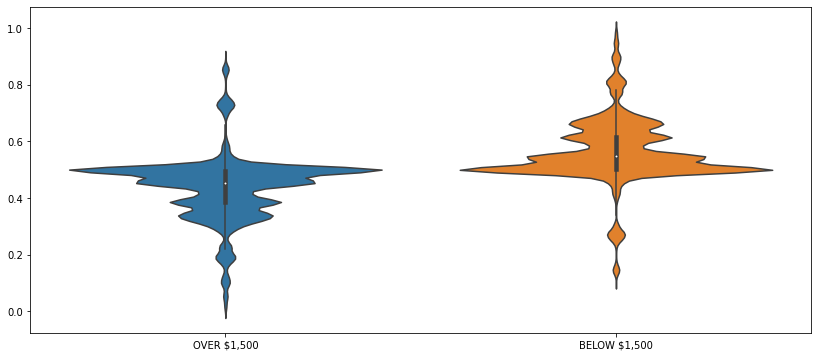

In [71]:
plt.figure(figsize=(14,6))
sns.violinplot(data = damage_prob)
plt.show()

In [74]:
y_pred = logit.predict(X_test)

In [73]:
y_test

81570     0
335227    1
87364     0
247509    1
292200    0
         ..
311808    0
149103    0
277290    1
191247    0
260900    0
Name: DAMAGE_BIN, Length: 74517, dtype: int64

In [76]:
from sklearn.metrics import confusion_matrix

In [80]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[ 9680, 22622],
       [ 8190, 34025]])

In [88]:
accuracy = (matrix[0,0] + matrix[1,1])/((matrix[0,0] + matrix[0,1]) + (matrix[1,0] + matrix[1,1]))
print('Accuracy:')
print(accuracy)

Accuracy:
0.5865104607002429


In [90]:
error = 1-accuracy
print('Error Rate:')
print(error)

Error Rate:
0.41348953929975707


In [92]:
fp = (matrix[0,1])/(matrix[0,0] + matrix[0,1])
print('False Positive Rate:')
print(fp)

False Positive Rate:
0.7003281530555383


In [93]:
fn = (matrix[1,0])/(matrix[1,0] + matrix[1,1])
print('False Negative Rate:')
print(fn)

False Negative Rate:
0.19400686959611513


>*The model makes a lot of Type I errors with a ~70% probability of getting one. There is a ~19% probability for Type II errors, making it considerably lower than the accuracy which is at ~58%.*